In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_data = pd.read_csv("C:/Users/Jennifer/Documents/INNHotelsGroup.csv")

In [3]:
hotel_data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
hotel_data.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [6]:
hotel_data = hotel_data.drop(['Booking_ID'], axis = 1)

In [7]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 
            'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 
            'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']

# Exploratory Data Anaylsis and Data Preprocessing

In [8]:
hotel_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


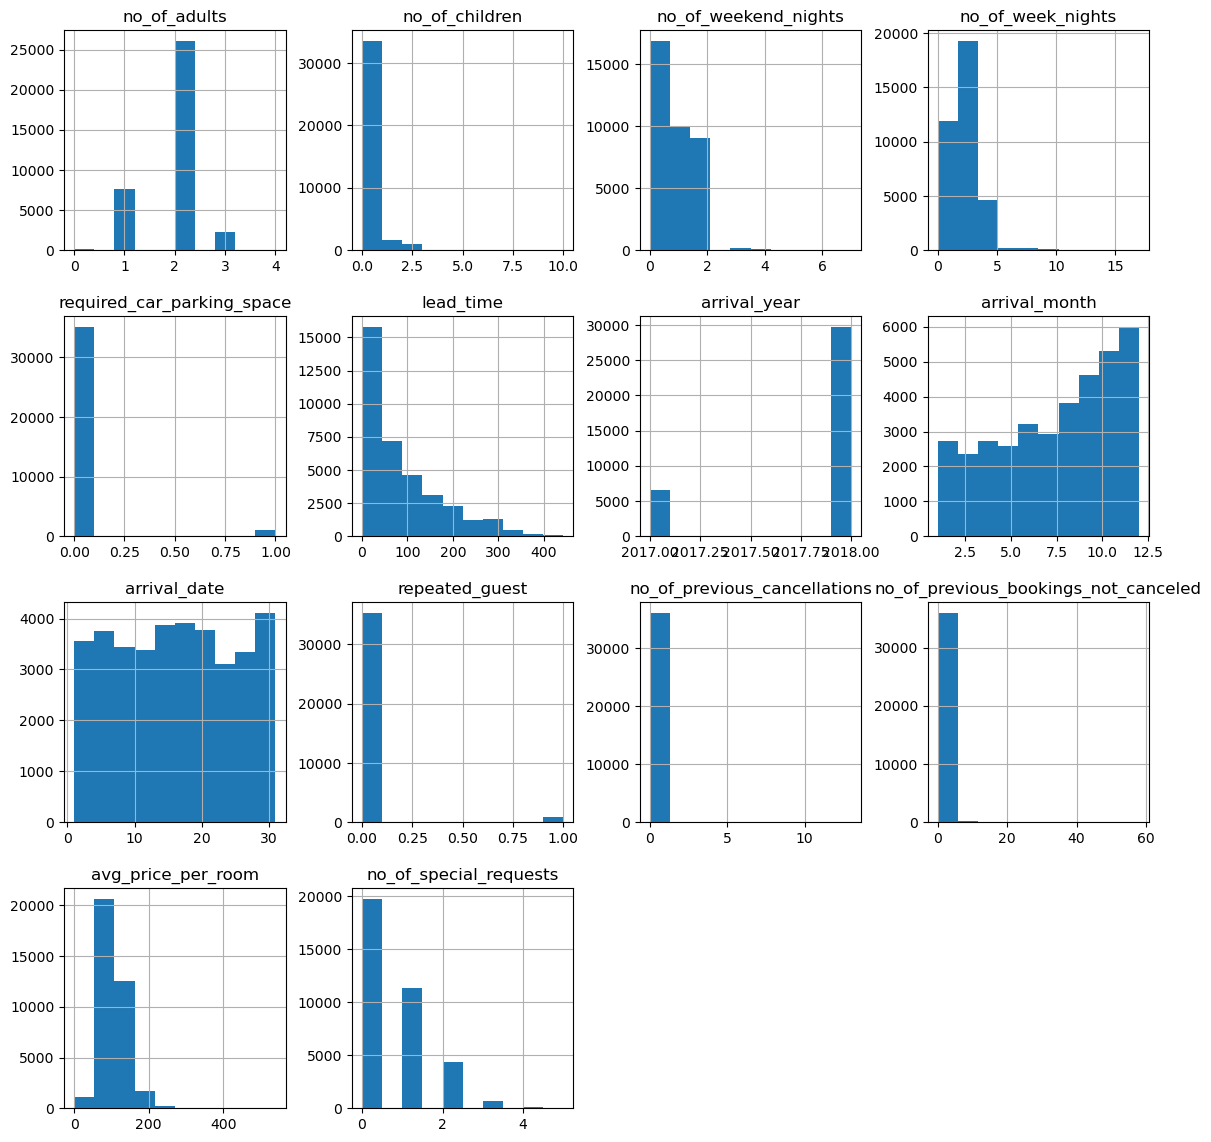

In [9]:
hotel_data[num_cols].hist(figsize = (14, 14))
plt.show()

In [10]:
for i in cat_cols:
    print(hotel_data[i].value_counts(normalize = True))
    print('-' * 30)

Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: type_of_meal_plan, dtype: float64
------------------------------
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: room_type_reserved, dtype: float64
------------------------------
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: market_segment_type, dtype: float64
------------------------------
Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64
------------------------------


# Building the Model

In [11]:
cat_cols_dummies = ['room_type_reserved', 'market_segment_type']
data = pd.get_dummies(data = hotel_data, columns = cat_cols_dummies, drop_first = True)

dict_Meal_Plan = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
data['type_of_meal_plan'] = data['type_of_meal_plan'].map(dict_Meal_Plan)

In [12]:
dict_Booking = {'Not_Canceled': 0, 'Canceled': 1}
data['booking_status'] = data.booking_status.map(dict_Booking)

In [13]:
y = data['booking_status']
x = data.drop(columns = 'booking_status')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [15]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [16]:
def model_performance_classification(model, predictors, target):
    predict = model.predict(predictors)
    recall = recall_score(target, predict, average = 'macro')
    precision = precision_score(target, predict, average = 'macro')
    accurate = accuracy_score(target, predict)
    
    performance_data = pd.DataFrame({'Precision': precision, 'Recall': recall, 'Accuracy': accurate}, index = [0])
    return performance_data

**Decision Tree Model**

In [17]:
dtree = DecisionTreeClassifier(random_state = 1)

In [18]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



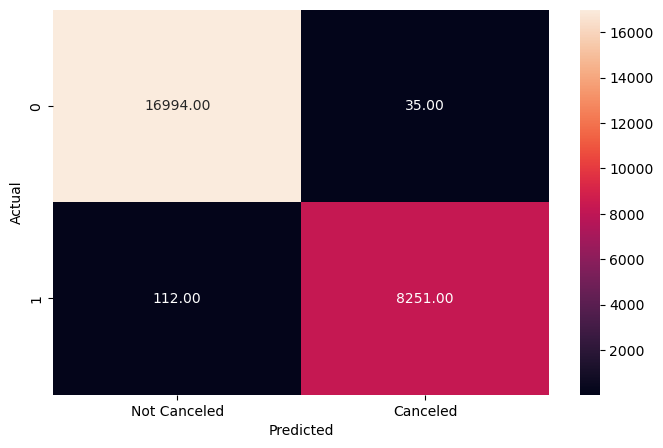

In [19]:
y_train_pred_dtree = dtree.predict(x_train)
metrics_score(y_train, y_train_pred_dtree)

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      7361
           1       0.80      0.81      0.81      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.86      0.86     10883
weighted avg       0.87      0.87      0.87     10883



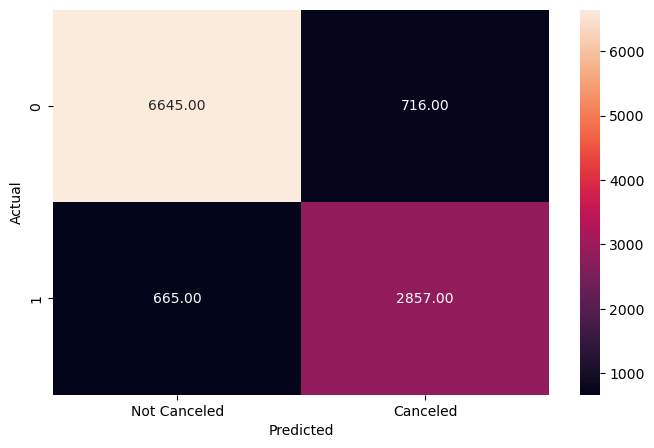

In [20]:
y_test_pred_dtree = dtree.predict(x_test)
metrics_score(y_test, y_test_pred_dtree)

In [21]:
dtree_test = model_performance_classification(dtree, x_test, y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.854318,0.856959,0.873105


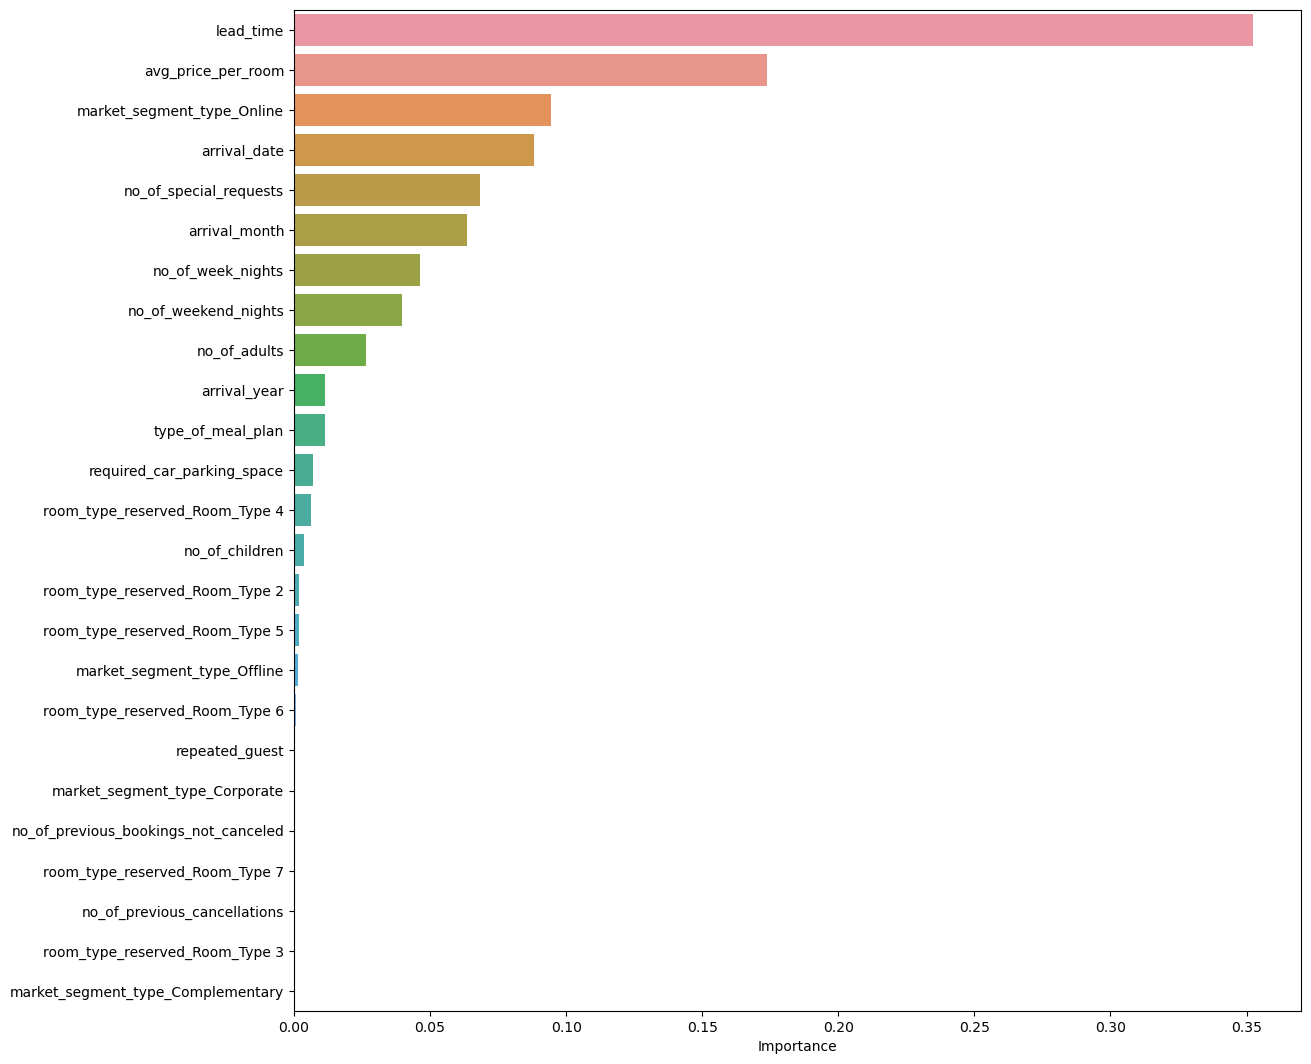

In [22]:
features = dtree.feature_importances_
columns = x.columns
features_dtree = pd.DataFrame(features, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(features_dtree.Importance, features_dtree.index)
plt.show()

In [23]:
dtree_estimator = DecisionTreeClassifier(random_state = 1)

parameters = {'max_depth': np.arange(2, 7), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}

scorer = metrics.make_scorer(recall_score, pos_label = 1)

gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)
gridCV = gridCV.fit(x_train, y_train)

dtree_estimator = gridCV.best_estimator_

dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83     17029
           1       0.65      0.73      0.69      8363

    accuracy                           0.78     25392
   macro avg       0.76      0.77      0.76     25392
weighted avg       0.79      0.78      0.79     25392



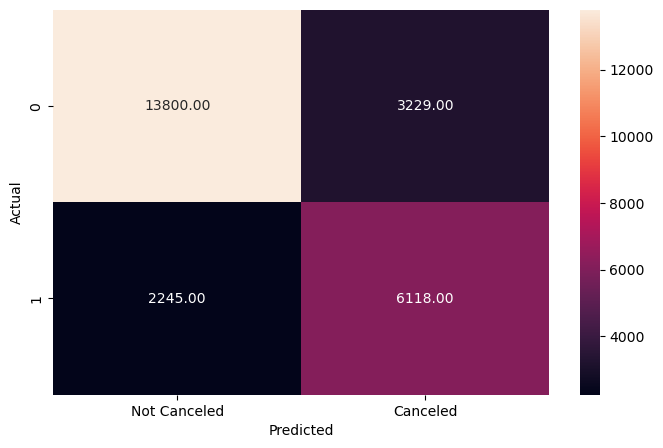

In [24]:
y_train_pred_dtree = dtree_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_dtree)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7361
           1       0.66      0.74      0.70      3522

    accuracy                           0.79     10883
   macro avg       0.76      0.78      0.77     10883
weighted avg       0.80      0.79      0.79     10883



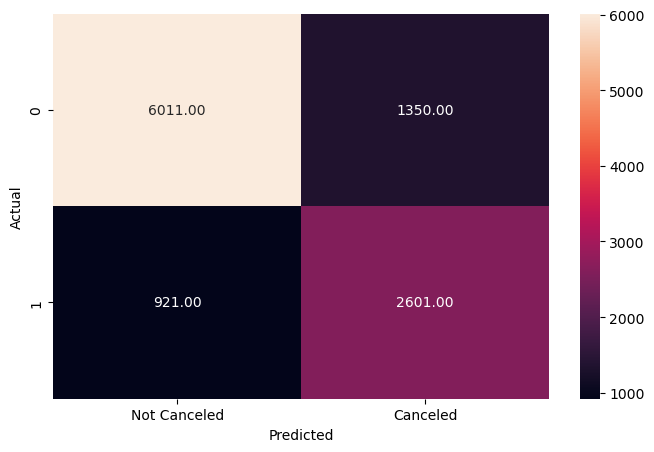

In [25]:
y_test_pred_dtree = dtree_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_dtree)

In [26]:
dtree_tuned_test = model_performance_classification(dtree_estimator, x_test, y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.762726,0.777551,0.791326


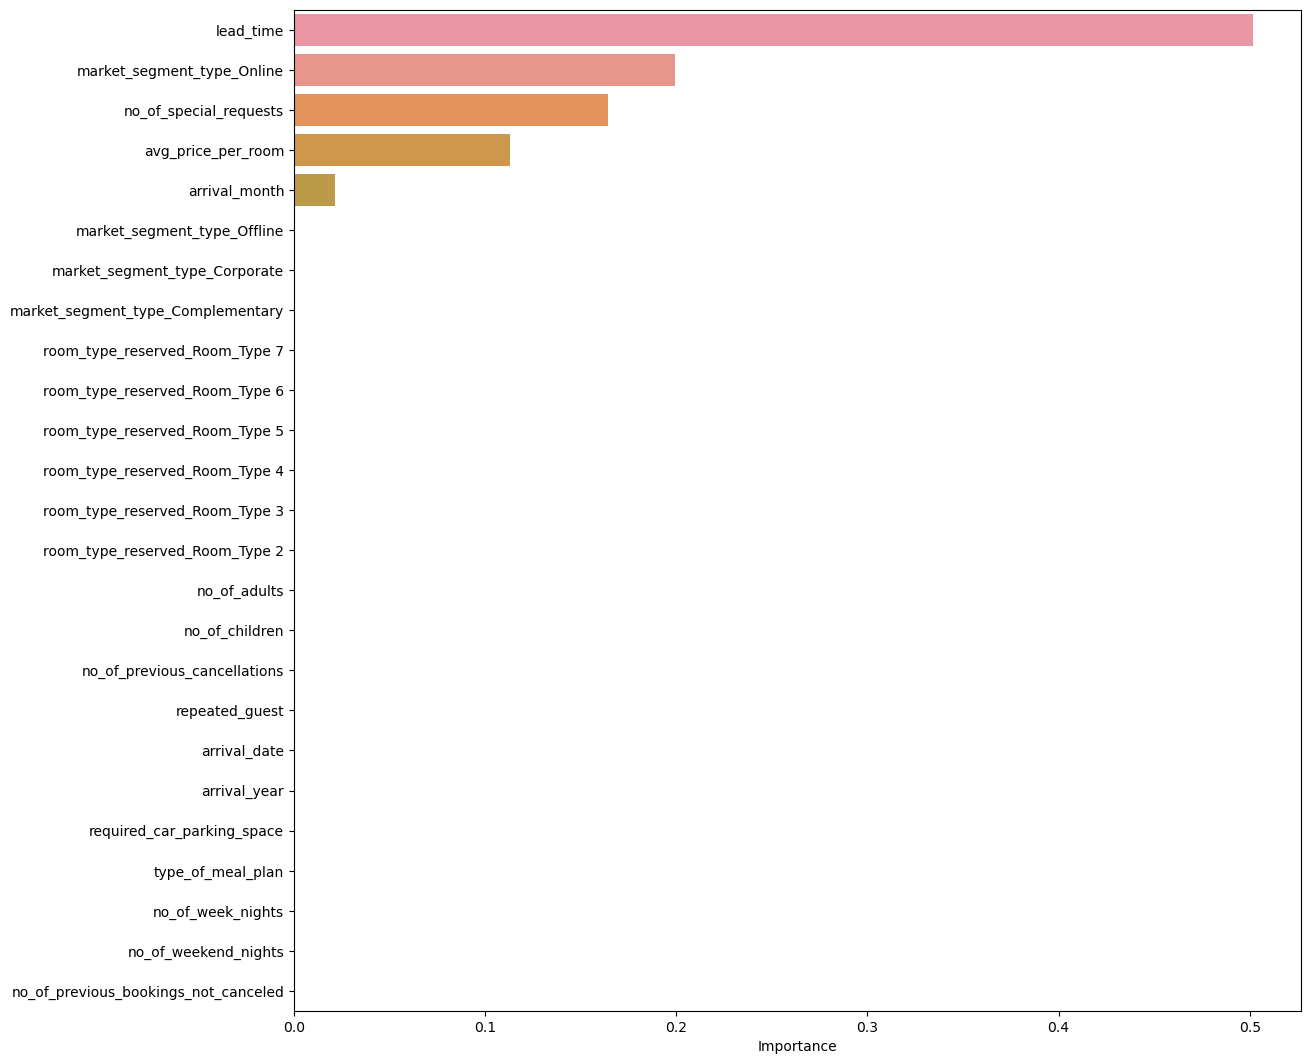

In [27]:
features = dtree_estimator.feature_importances_
columns = x.columns
features_dtree = pd.DataFrame(features, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(features_dtree.Importance, features_dtree.index)
plt.show()

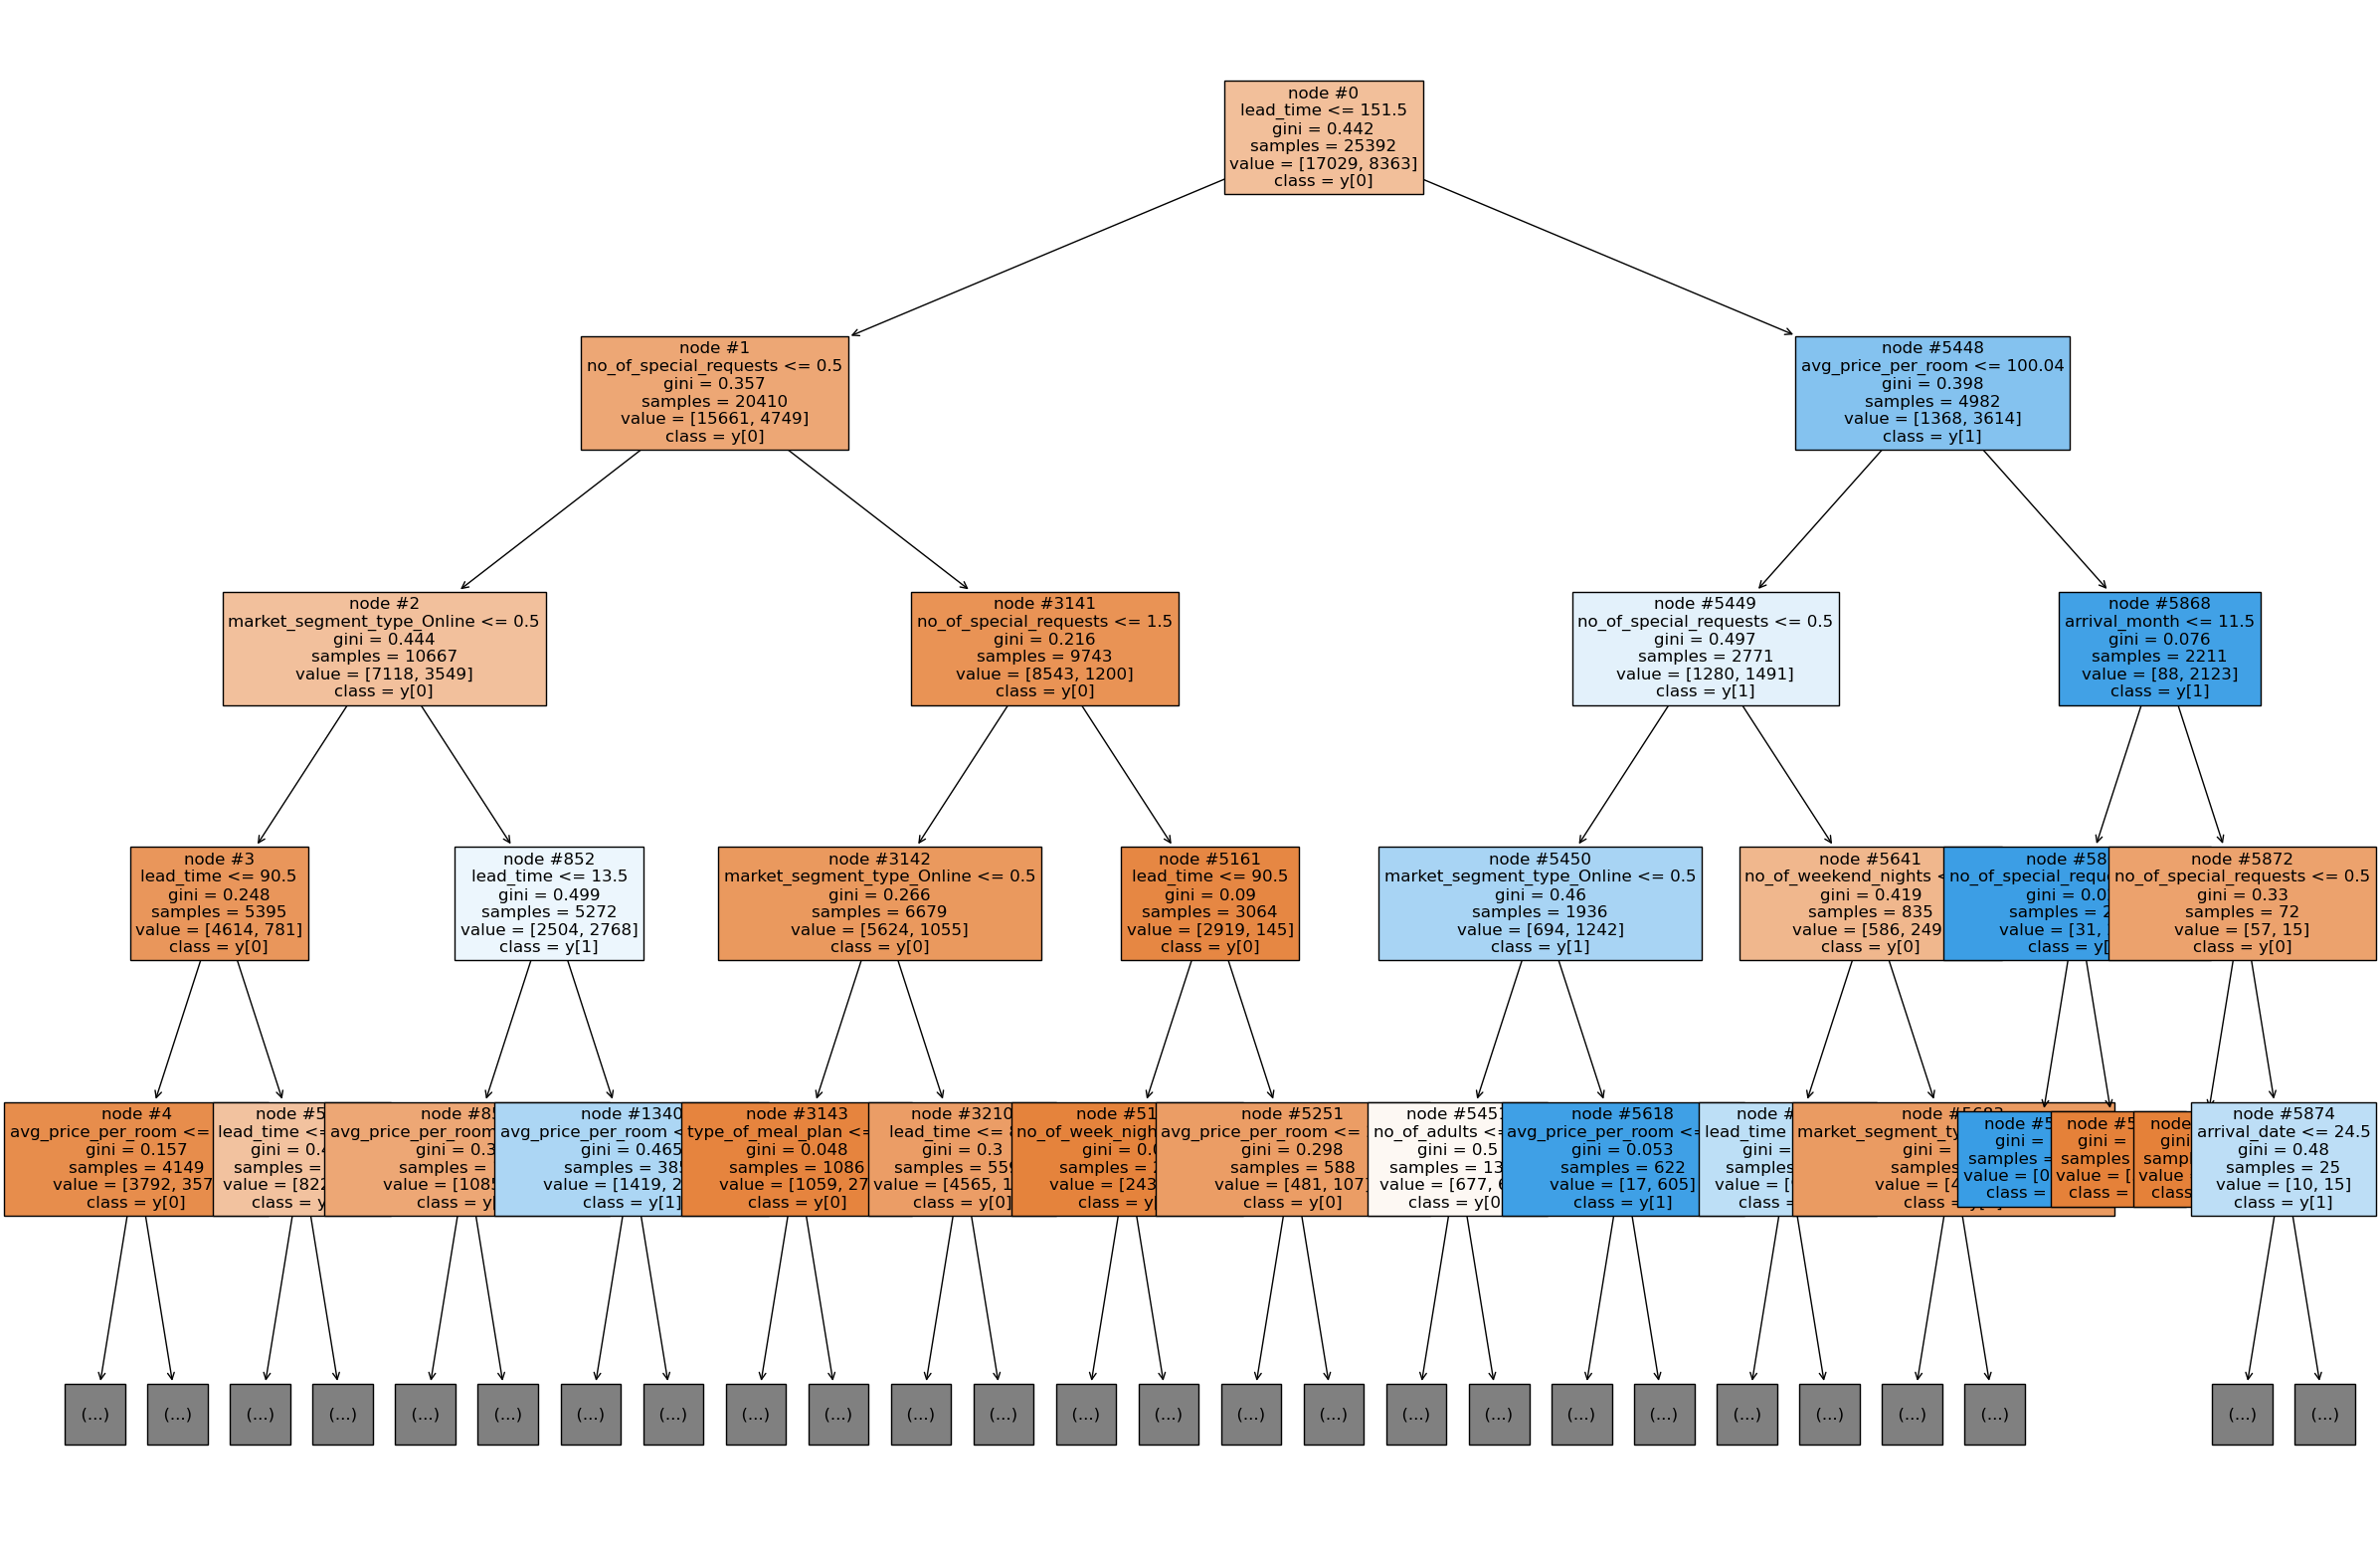

In [28]:
hotel_features = list(x.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(dtree, max_depth = 4, feature_names = hotel_features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

In [29]:
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       0.99      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



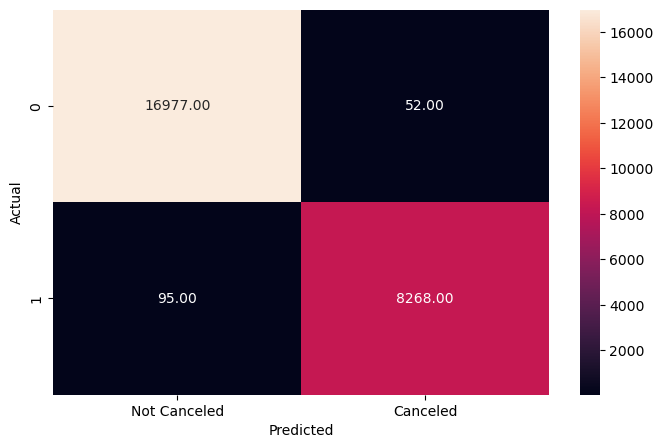

In [30]:
y_train_pred_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_train_pred_rf)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7361
           1       0.88      0.81      0.85      3522

    accuracy                           0.91     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.91      0.90     10883



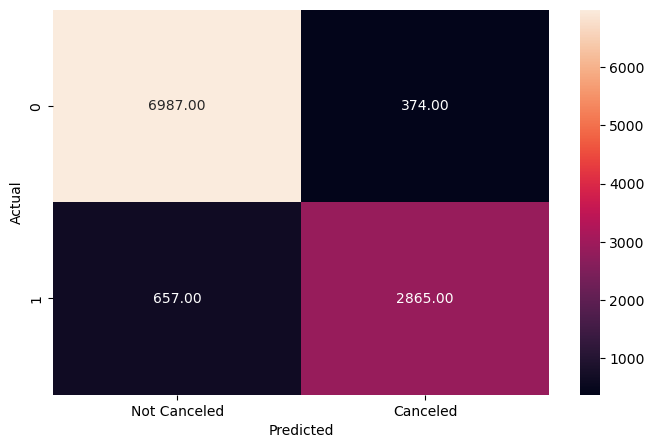

In [31]:
y_test_pred_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_test_pred_rf)

In [32]:
rf_estimator_test = model_performance_classification(rf_estimator, x_test, y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.899291,0.881325,0.905265


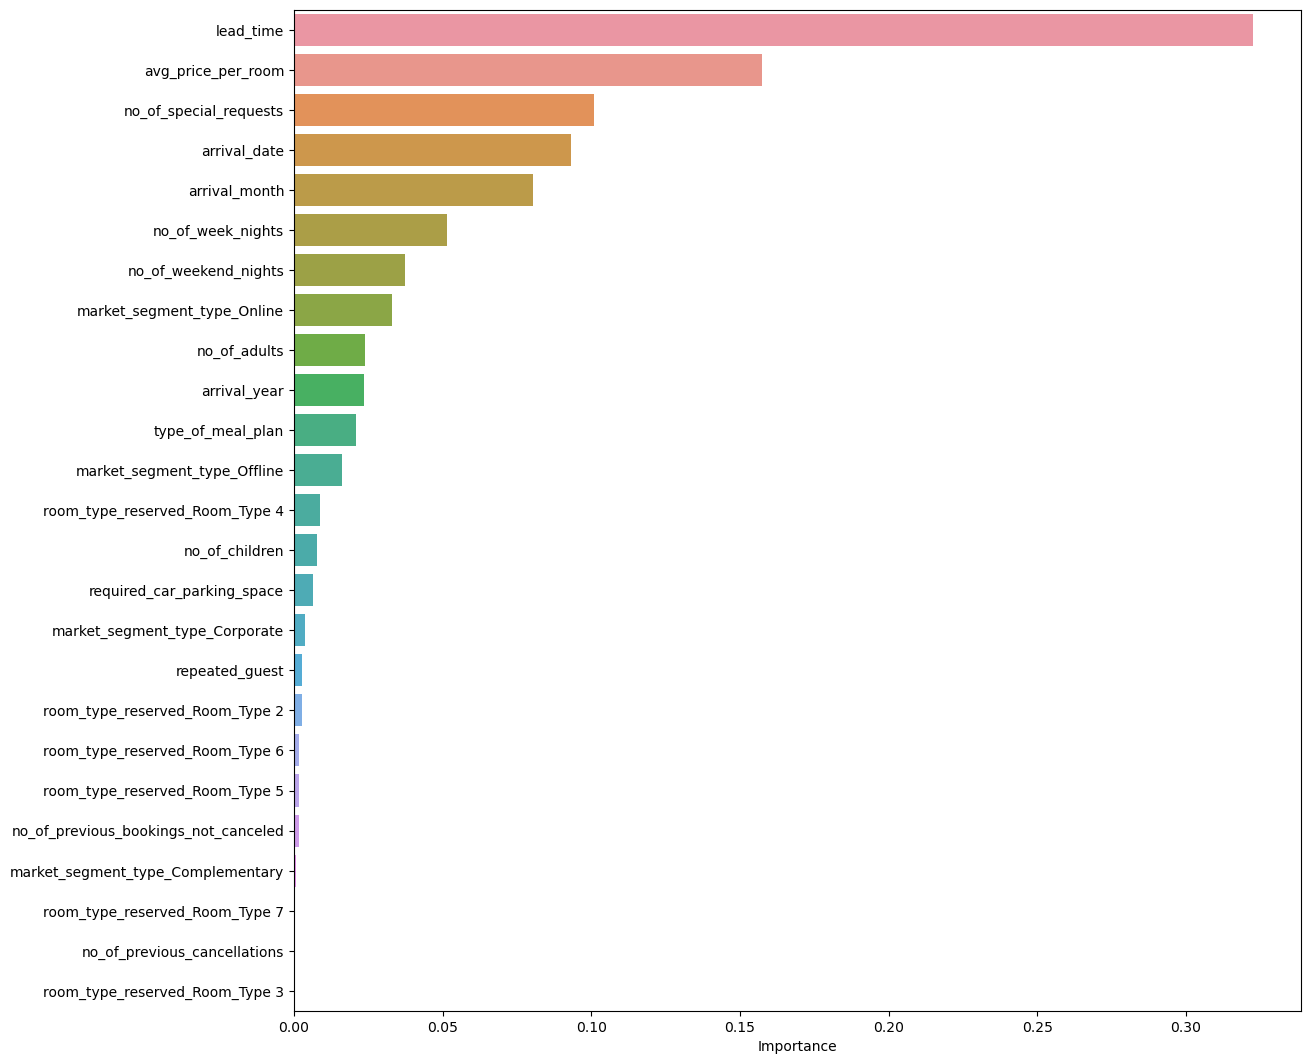

In [33]:
features = rf_estimator.feature_importances_
columns = x.columns
features_rf = pd.DataFrame(features, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(features_rf.Importance, features_rf.index)
plt.show()

In [34]:
rf_estimator_tuned = RandomForestClassifier(random_state = 1)
params_rf = {'n_estimators': [100, 250, 500], 'min_samples_leaf': np.arange(1, 4, 1), 'max_features': [0.7, 0.9, 'auto']}

scorer = metrics.make_scorer(recall_score, pos_label = 1)
gridcv = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)
gridcv = gridcv.fit(x_train, y_train)

rf_estimator_tuned = gridcv.best_estimator_

In [35]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       0.99      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



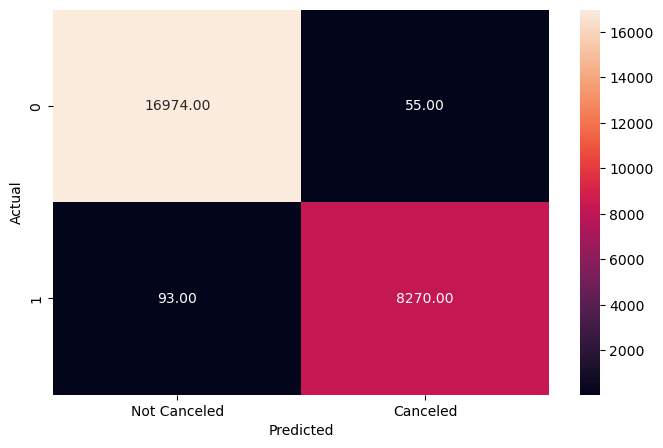

In [36]:
y_train_pred_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_train_pred_rf_tuned)

In [37]:
y_train_pred_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_train, y_train_pred_rf_tuned)

ValueError: Found input variables with inconsistent numbers of samples: [25392, 10883]

In [ ]:
features = rf_estimator_tuned.feature_importances_
columns = x.columns
features_rft = pd.DataFrame(features, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(features_rft.Importance, features_rft.index)
plt.show()